In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

import cv2

In [2]:
#Define epochs for all models.
epochs = 10

train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [3]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  R


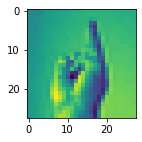

In [4]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])


Label for the image is:  Q


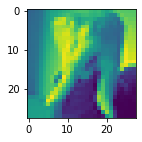

In [5]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

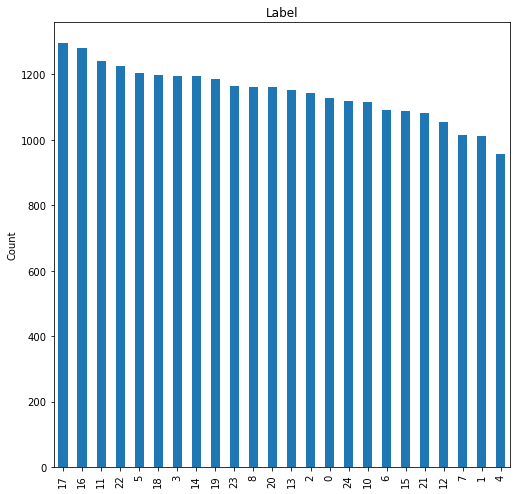

In [6]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [7]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [8]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [9]:
#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [10]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1
        ) # randomly shift images vertically (fraction of total height)


datagen.fit(X_train)

In [11]:
#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()
model1.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 25 , activation = 'softmax'))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [13]:
history = model1.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,epochs = 20 , validation_data = (X_test, y_test_cat) , callbacks = [learning_rate_reduction])

Epoch 1/20


ValueError: in user code:

    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 25) are incompatible


In [ ]:
model1.save('model1.hdf5')

In [ ]:
#Model2
model2 = Sequential() 

model2.add(Conv2D(256 , (9,9) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((4,4) , strides = 2 , padding = 'same'))
model2.add(Conv2D(128 , (9,9) , strides = 1 , padding = 'same' , activation = 'relu'))
#Dropout
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((4,4) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (9,9) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((4,4) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(25, activation='softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 256)       20992     
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       2654336   
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 128)     

In [ ]:
Earlystopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [ ]:
history2 = model2.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,epochs = 20 , validation_data = (X_test, y_test_cat) , callbacks = [Earlystopping])

Epoch 1/20
215/215 [==============================] - 526s 2s/step - loss: 1.1528 - accuracy: 0.6617 - val_loss: 7.0592 - val_accuracy: 0.0484
Epoch 2/20
215/215 [==============================] - 498s 2s/step - loss: 0.1289 - accuracy: 0.9576 - val_loss: 1.2620 - val_accuracy: 0.5983
Epoch 3/20
215/215 [==============================] - 509s 2s/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.2631 - val_accuracy: 0.9137
Epoch 4/20
215/215 [==============================] - 485s 2s/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 1.0214 - val_accuracy: 0.7326
Epoch 5/20
215/215 [==============================] - 501s 2s/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 3.3106 - val_accuracy: 0.4414


In [ ]:
model2.save('model2.hdf5')

In [ ]:
#model3

model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2), strides=2))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2), strides=2))
model3.add(Flatten())
model3.add(Dense(units=25, activation='softmax'))

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_22 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
history3 = model3.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,epochs = 10 , validation_data = (X_test, y_test_cat) , callbacks = [learning_rate_reduction], verbose=True)

Epoch 1/10
215/215 [==============================] - 17s 77ms/step - loss: 0.9317 - accuracy: 0.7175 - val_loss: 3.2338 - val_accuracy: 0.0485 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 17s 80ms/step - loss: 0.2331 - accuracy: 0.9272 - val_loss: 1.3265 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 17s 79ms/step - loss: 0.1261 - accuracy: 0.9612 - val_loss: 0.2037 - val_accuracy: 0.9241 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 17s 80ms/step - loss: 0.0884 - accuracy: 0.9721 - val_loss: 0.0614 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 18s 82ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0613 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 17s 80ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0223 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 7/10
215/215 [==============================] - 20s 

In [ ]:
model2.save('model3.hdf5')

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('model1.hdf5')
model2 = load_model('model2.hdf5')
model3 = load_model('model3.hdf5')
models = [model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)


In [ ]:
# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(X_test) 
classes_1=np.argmax(prediction1,axis=1)
prediction2 = model3.predict(X_test) 
classes_2=np.argmax(prediction2,axis=1)
prediction3 = model3.predict(X_test) 
classes_3=np.argmax(prediction3,axis=1)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets